In [120]:
import keras

In [150]:
import numpy as np
center = np.random.random(50000)

In [151]:
stddev = np.random.random(50000)

In [152]:
gaussians = np.random.normal(0, 1, 50000)

In [153]:
gaussians *= stddev

In [154]:
values = np.linspace(-3, 3, 200)

In [155]:
import matplotlib.pyplot as plt

(array([1.2000e+01, 8.5000e+01, 4.9200e+02, 2.9570e+03, 1.4156e+04,
        2.3075e+04, 7.3730e+03, 1.5680e+03, 2.5500e+02, 2.7000e+01]),
 array([-3.221056  , -2.51918514, -1.81731429, -1.11544343, -0.41357258,
         0.28829828,  0.99016913,  1.69203999,  2.39391084,  3.09578169,
         3.79765255]),
 <a list of 10 Patch objects>)

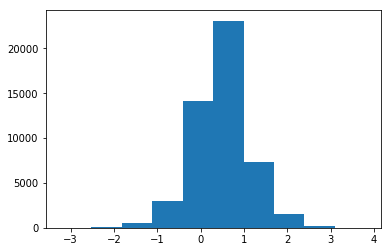

In [156]:
plt.hist(gaussians + center)

In [157]:
y = 1 * (np.expand_dims(values, 0) > np.expand_dims(gaussians + center, 1))

In [158]:
x = np.concatenate([np.expand_dims(center, 1), np.expand_dims(stddev, 1)], 1)
x

array([[0.02114561, 0.37698984],
       [0.28527335, 0.87977536],
       [0.92024085, 0.15322103],
       ...,
       [0.40813517, 0.14177581],
       [0.46961075, 0.08595104],
       [0.43070427, 0.81766198]])

In [159]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(512, input_shape=(2,)),
    Activation('relu'),
    Dense(512, input_shape=(2,)),
    Activation('relu'),
    Dense(512, input_shape=(2,)),
    Activation('relu'),
    Dense(200),
    Activation('sigmoid'),
])

In [162]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[])

In [163]:
model.fit(x, y, epochs=1)

Epoch 1/1
50000/50000 [==============================] - 28s 565us/step - loss: 0.0505


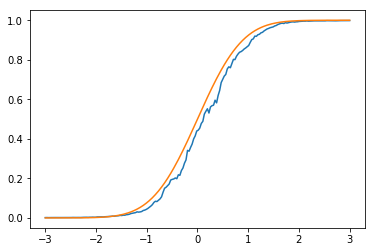

In [280]:
a, b = 0, .7

plt.plot(values, model.predict(np.array([[a, b]]))[0])
rv = norm(loc = a, scale = b)
plt.plot(values, rv.cdf(values))
plt.show()

In [281]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np 

#initialize a normal distribution with frozen in mean=-1, std. dev.= 1
#rv = norm(loc = .5, scale = .1)

In [282]:
def choose_distribution(values, dist):
    latent = np.random.random()
    less = latent < dist
    more = latent > dist
    return (values[np.argmax(less)] + 
            np.flip(values, 0)[np.argmax(np.flip(more, 0))]) / 2

In [283]:
dist = model.predict(np.array([[a, b]]))[0]

In [284]:
choose_distribution(values, dist)

-0.7236180904522616

In [285]:
t = [choose_distribution(values, dist) for _ in range(50000)]

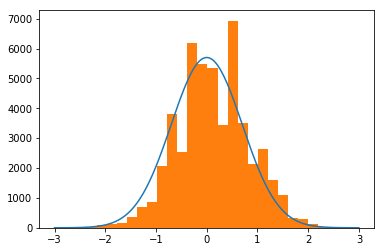

In [286]:
plt.plot(values, rv.pdf(values) * 50000 / 5)
plt.hist(np.array(t), 30)
plt.show()

[-1.4623115577889447,
 -1.4472361809045227,
 -1.1155778894472363,
 -0.6482412060301508,
 -1.8844221105527639,
 -2.035175879396985,
 -1.5829145728643217,
 -2.050251256281407,
 -1.8391959798994975,
 -1.0251256281407035,
 -0.8140703517587942,
 -1.899497487437186,
 -1.2964824120603016,
 -1.5829145728643217,
 -0.9648241206030153,
 -1.7788944723618092,
 -1.5376884422110553,
 -1.7035175879396987,
 -0.6482412060301508,
 -1.628140703517588,
 -1.1758793969849246,
 -1.3869346733668342,
 -1.5527638190954773,
 -1.5829145728643217,
 -1.4321608040201006,
 -0.7386934673366836,
 -1.2964824120603016,
 -1.1155778894472363,
 -1.7487437185929648,
 -1.8693467336683418,
 -1.5979899497487438,
 -1.8542713567839197,
 -1.6432160804020102,
 -1.4773869346733668,
 -0.7688442211055277,
 -0.5879396984924625,
 -1.4472361809045227,
 -1.492462311557789,
 -1.4623115577889447,
 -1.35678391959799,
 -1.190954773869347,
 -1.8241206030150754,
 -0.9949748743718594,
 -1.7035175879396987,
 -1.6582914572864322,
 -1.34170854271356